In [1]:
#Question 1

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('diabetes.csv')

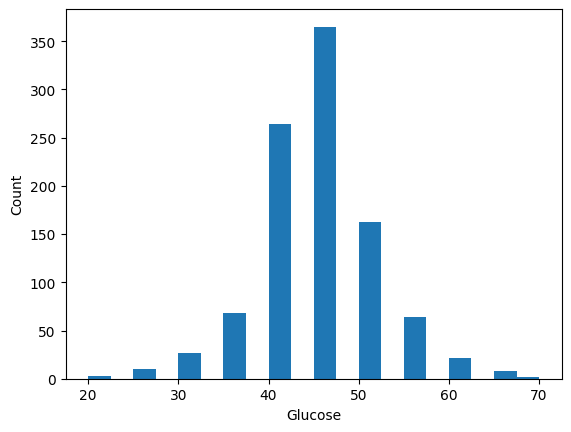

In [3]:
plt.hist(data['glucose'], bins=20)
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.show()

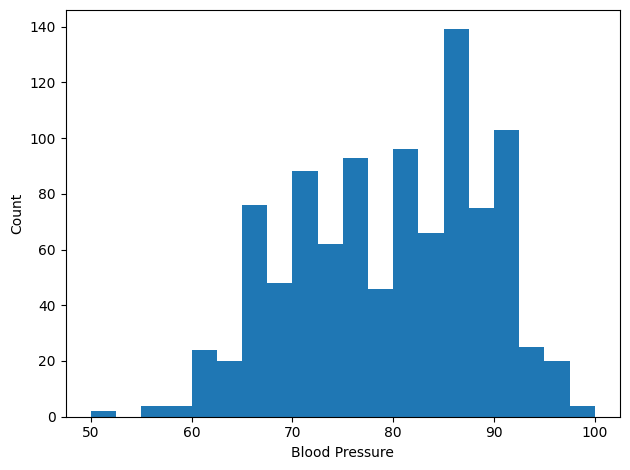

In [4]:
plt.hist(data['bloodpressure'], bins=20)
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [5]:
X = data[['glucose', 'bloodpressure']]
y = data['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9597989949748744


In [1]:
# Question 2

!pip install xgboost
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
num_cols = ['age', 'bmi', 'children']
cat_cols = ['sex', 'region', 'smoker']
target_col = 'charges'

In [4]:
label_encoder = LabelEncoder()
for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [5]:
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols].values)
scaler_charges = StandardScaler()
data[target_col] = scaler_charges.fit_transform(data[target_col].values.reshape(-1, 1))

In [6]:
X = data.drop(target_col, axis=1)
y = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
svr_grid = {
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': [0.1, 1.0, 10.0]
}
svr = SVR()
rs_svr = RandomizedSearchCV(svr, svr_grid, cv=3)
rs_svr.fit(X_train, y_train)
best_svr = rs_svr.best_estimator_
y_pred_svr = best_svr.predict(X_test)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [10]:
adaboost_grid = {
    'n_estimators': [50, 100, 200],
    'loss': ['linear', 'square', 'exponential']
}
adaboost = AdaBoostRegressor()
adaboost_gs = GridSearchCV(adaboost, adaboost_grid, cv=3)
adaboost_gs.fit(X_train, y_train)
best_adaboost = adaboost_gs.best_estimator_
y_pred_adaboost = best_adaboost.predict(X_test)
mae_adaboost = mean_absolute_error(y_test, y_pred_adaboost)
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)

In [11]:
# Random Forest Regressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)

# Gradient Boosting Regression
gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting.predict(X_test)
mae_gradient_boosting = mean_absolute_error(y_test, y_pred_gradient_boosting)
mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)

# XGBoost Regressor
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train, y_train)
y_pred_xgb = xgb_regressor.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

In [12]:
models = ['SVR', 'AdaBoost', 'Random Forest', 'Gradient Boosting', 'XGBoost']
mae_scores = [mae_svr, mae_adaboost, mae_random_forest, mae_gradient_boosting, mae_xgb]
mse_scores = [mse_svr, mse_adaboost, mse_random_forest, mse_gradient_boosting, mse_xgb]

# Print MAE scores
print("MAE Scores:")
for model, score in zip(models, mae_scores):
    print(f"{model}: {score}")

# Print MSE scores
print("\nMSE Scores:")
for model, score in zip(models, mse_scores):
    print(f"{model}: {score}")

MAE Scores:
SVR: 0.21030902111052796
AdaBoost: 0.3470096916036045
Random Forest: 0.2166471113359101
Gradient Boosting: 0.19721700363447356
XGBoost: 0.24074102782382037

MSE Scores:
SVR: 0.14620024386017894
AdaBoost: 0.1876147549070931
Random Forest: 0.14470096529025375
Gradient Boosting: 0.12978475274479548
XGBoost: 0.17186544103223161


In [13]:
# Question 3


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [14]:
data = pd.read_csv('bookmyshow_ads.csv')

In [24]:
X = data.drop(['index', 'Result'], axis=1)
y = data['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
X_train

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
799,1,0,1,1,1,1,0,1,1,0,...,1,0,0,1,1,1,0,1,1,0
9726,0,0,0,0,0,0,-1,1,1,0,...,1,0,1,1,0,1,0,1,1,1
5989,0,0,1,1,1,0,-1,0,0,1,...,1,1,1,0,1,1,1,1,-1,1
2205,1,0,1,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,-1,0
5698,0,0,1,1,1,0,-1,0,1,1,...,1,1,1,0,1,0,1,1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,1,0,1,1,1,0,0,1,0,0,...,1,0,1,1,0,1,1,1,1,1
3339,1,1,1,1,1,0,0,1,0,0,...,1,1,1,0,1,1,1,1,-1,0
10262,0,0,1,1,1,0,-1,0,0,1,...,1,0,1,1,1,-1,0,1,1,1
4800,1,0,1,1,1,0,0,1,0,1,...,1,1,1,1,1,1,0,1,-1,1


In [31]:
models = [
    ('Decision Tree', DecisionTreeClassifier(), {'max_depth': [None, 5, 10]}),
    ('Random Forest', RandomForestClassifier(), {'n_estimators': [50, 100, 200]}),
    ('AdaBoost', AdaBoostClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0]}),
    ('Gradient Boost', GradientBoostingClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0]}),
    ('XGBoost', XGBClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0]})
]
for name, model, param_grid in models:
    print(f"Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.5f}")

Model: Decision Tree
Accuracy: 0.95568

Model: Random Forest
Accuracy: 0.96879

Model: AdaBoost
Accuracy: 0.93125

Model: Gradient Boost
Accuracy: 0.94437

Model: XGBoost
Accuracy: 0.96517



In [32]:
for name, model, param_grid in models:
    print(f"Model: {name}")
    # GridSearchCV
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=3)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    print("Best Parameters (GridSearchCV):")
    for param, value in best_params.items():
        print(f"{param}: {value}")
    # RandomizedSearchCV
    randomized_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=3)
    randomized_search.fit(X_train, y_train)
    best_params = randomized_search.best_params_
    print("\nBest Parameters (RandomizedSearchCV):")
    for param, value in best_params.items():
        print(f"{param}: {value}")

Model: Decision Tree
Best Parameters (GridSearchCV):
max_depth: None


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best Parameters (RandomizedSearchCV):
max_depth: None

Model: Random Forest
Best Parameters (GridSearchCV):
n_estimators: 200


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best Parameters (RandomizedSearchCV):
n_estimators: 100

Model: AdaBoost
Best Parameters (GridSearchCV):
learning_rate: 1.0
n_estimators: 50


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best Parameters (RandomizedSearchCV):
n_estimators: 50
learning_rate: 1.0

Model: Gradient Boost
Best Parameters (GridSearchCV):
learning_rate: 0.5
n_estimators: 200


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best Parameters (RandomizedSearchCV):
n_estimators: 200
learning_rate: 0.5

Model: XGBoost
Best Parameters (GridSearchCV):
learning_rate: 0.5
n_estimators: 200


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best Parameters (RandomizedSearchCV):
n_estimators: 200
learning_rate: 0.5



In [40]:
# Question 4

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [34]:
data = pd.read_csv('segmentation data.csv')

In [35]:
data = data.drop(['ID'], axis=1)
print(data.isnull().sum())
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'Income']])

def age_groups(age):
    if age <= 28:
        return 'Young'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Senior'
data['Age Group'] = data['Age'].apply(age_groups)

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

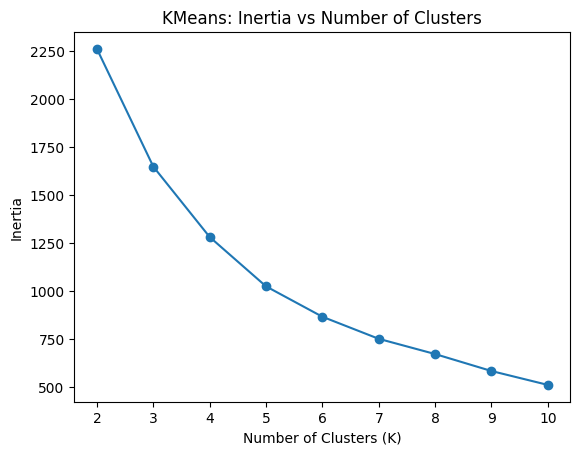

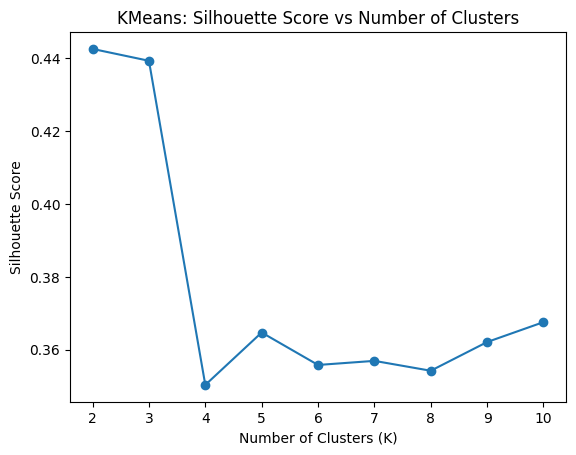

In [36]:
k_values = range(2, 11)
inertia_values = []
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('KMeans: Inertia vs Number of Clusters')
plt.show()

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('KMeans: Silhouette Score vs Number of Clusters')
plt.show()

In [37]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)
silhouette_score_kmeans = silhouette_score(data_scaled, kmeans.labels_)
labels_kmeans = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [53]:
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters

def update_centroids(data, clusters, K):
    centroids = []
    for k in range(K):
        cluster_points = data[np.array(clusters) == k]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)
    return centroids

def compare_element(elem1, elem2):
    if type(elem1) != type(elem2):
        return False
    if isinstance(elem1, np.ndarray):
        return (elem1 == elem2).all()


def train_kmeans(data, K, max_iterations=100):
    centroids = data[np.random.choice(data.shape[0], size=K, replace=False)]
    for _ in range(max_iterations):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, K)
        if np.all(compare_element(centroids, new_centroids)):
            break
        centroids = new_centroids
    return clusters

best_accuracy = 0
best_labels = None
for _ in range(10):
    labels = train_kmeans(data_scaled, 5)  # 5 gives the closest result
    accuracy = np.mean(labels == labels_kmeans)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_labels = labels
print(f"Accuracy compared to sklearn KMeans: {best_accuracy:.4f}")

Accuracy compared to sklearn KMeans: 0.3185


In [62]:
epsilon_values = [0.1, 0.2, 0.5, 1, 2]
min_samples_values = [3, 4, 5, 6]
max_silhouette_score = -1
best_eps = None
best_min_samples = None
for eps in epsilon_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(data_scaled)
        k=np.unique(dbscan.labels_)
        if(len(k)>1):
          silhouette = silhouette_score(data_scaled, dbscan.labels_)
          if silhouette > max_silhouette_score:
              max_silhouette_score = silhouette
              best_eps = eps
              best_min_samples = min_samples
print(f"Best parameters (DBSCAN): epsilon={best_eps}, min_samples={best_min_samples}")

Best parameters (DBSCAN): epsilon=1, min_samples=3


In [63]:
def distance(a, b):
    return np.linalg.norm(a - b)

def get_neighbors(data, point, epsilon):
    neighbors = []
    for i, p in enumerate(data):
        if distance(point, p) < epsilon:
            neighbors.append(i)
    return neighbors

def expand_cluster(data, labels, point_index, neighbors, cluster_id, epsilon, min_samples):
    labels[point_index] = cluster_id
    i = 0
    while i < len(neighbors):
        neighbor_index = neighbors[i]
        if labels[neighbor_index] == -1:
            labels[neighbor_index] = cluster_id
        elif labels[neighbor_index] == 0:
            labels[neighbor_index] = cluster_id
            new_neighbors = get_neighbors(data, data[neighbor_index], epsilon)
            if len(new_neighbors) >= min_samples:
                neighbors += new_neighbors
        i += 1

def train_dbscan(data, epsilon, min_samples):
    labels = np.zeros(len(data))
    cluster_id = 0
    for i, point in enumerate(data):
        if labels[i] != 0:
            continue
        neighbors = get_neighbors(data, point, epsilon)
        if len(neighbors) < min_samples:
            labels[i] = -1
        else:
            cluster_id += 1
            expand_cluster(data, labels, i, neighbors, cluster_id, epsilon, min_samples)
    return labels

labels_dbscan = train_dbscan(data_scaled, best_eps, best_min_samples)
silhouette_score_dbscan = silhouette_score(data_scaled, labels_dbscan)
print(f"Silhouette score (DBSCAN): {silhouette_score_dbscan:.4f}")

Silhouette score (DBSCAN): 0.6420
